In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.model_selection import train_test_split

In [2]:
import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_8748b8363b984486b9ae94867475fe86 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='DovS3eV_r8n9off1_IgJW1u474otZQAhaatdCT5k1kC2',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_8748b8363b984486b9ae94867475fe86.get_object(Bucket='predectinglifeexpectancy-donotdelete-pr-wdsdlfc2ne9bvo',Key='Life_Expectancy_Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
df = df_data_1
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

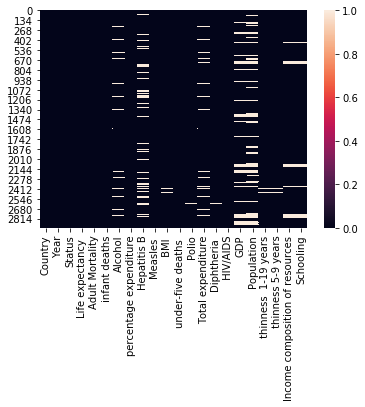

In [5]:
# Plotting the heat map for null values
sns.heatmap(pd.isnull(df))

In [6]:
col = list(df.columns)
nan_list = []

for i in col :
    x = df[i].isnull().sum()
    nan_list.append(x)
    
null_df = pd.DataFrame({'Columns ':col, 'No. of Nan Values':nan_list})
null_df

,Columns,No. of Nan Values
0,Country,0
1,Year,0
2,Status,0
3,Life expectancy,10
4,Adult Mortality,10
5,infant deaths,0
6,Alcohol,194
7,percentage expenditure,0
8,Hepatitis B,553
9,Measles,0


In [7]:
# Filling the Null values of Life Expecatncy and Adult Mortality columns

df['Life expectancy '] = df['Life expectancy '].fillna(value=df['Life expectancy '].mean())

df['Adult Mortality'] = df['Adult Mortality'].fillna(value=df['Adult Mortality'].mean())

## Data Correlation

In [8]:
df_corr = df.corr()
df_corr

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.169623,-0.078861,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,0.169623,1.000000,-0.696359,-0.196535,0.404029,0.381791,0.255760,-0.157574,0.564466,-0.222503,0.464531,0.216373,0.478465,-0.556457,0.461393,-0.021548,-0.476561,-0.470977,0.724631,0.748263
Adult Mortality,-0.078861,-0.696359,1.000000,0.078747,-0.195454,-0.242814,-0.161828,0.031174,-0.384806,0.094135,-0.274218,-0.114355,-0.274540,0.523727,-0.296019,-0.013639,0.302501,0.308053,-0.457530,-0.452380
infant deaths,-0.037415,-0.196535,0.078747,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404029,-0.195454,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,0.381791,-0.242814,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.255760,-0.161828,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157574,0.031174,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.564466,-0.384806,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.042937,-0.222503,0.094135,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


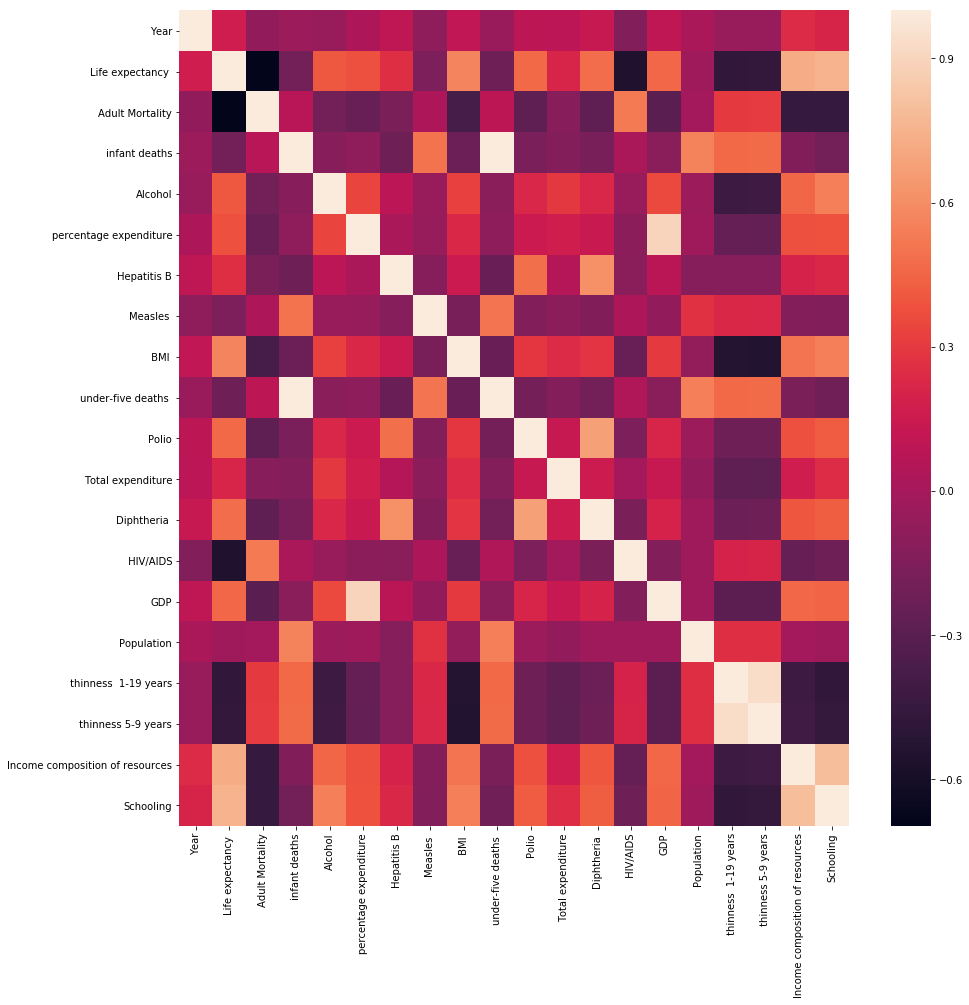

In [9]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr)

#### Schooling and Alcohol are highly correlated

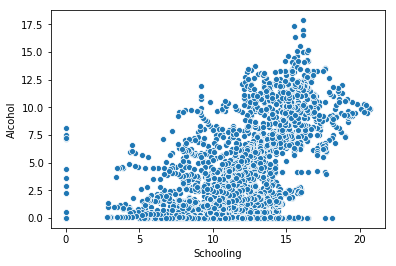

In [10]:
# from heatmap, schooling and alcohol are highly correlated

sns.scatterplot(df['Schooling'], df['Alcohol'])

In [11]:
def alcohol(cols):
    a = cols[0]
    age = cols[1]
    if pd.isnull(a):
        if age <= 2.5:
            return 0.5
        elif 2.5 < age <= 5.0:
            return 1.5
        elif 5.0 < age <= 7.5:
            return 2.5
        elif 7.5 < age <= 10.0:
            return 3.0
        elif 10.0 < age <= 15.0:
            return 4.0
        elif age > 15.0:
            return 10
    else: 
        return a
    
df['Alcohol'] = df[['Alcohol', 'Schooling']].apply(alcohol, axis=1)

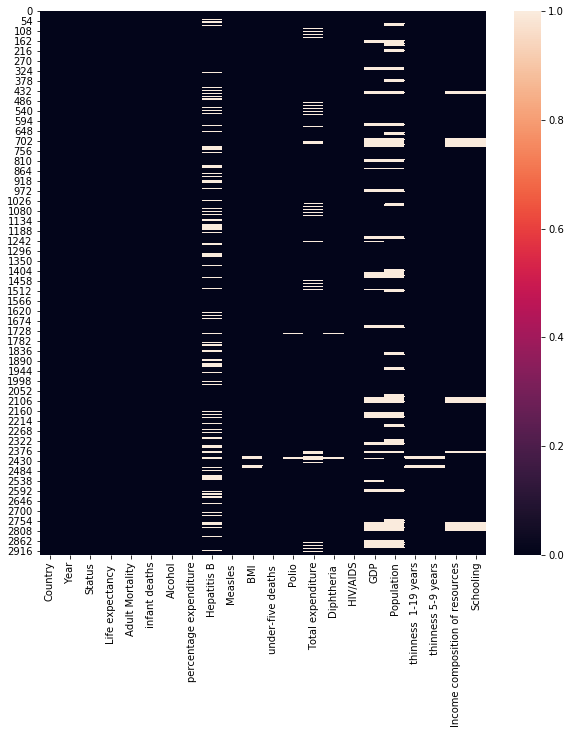

In [12]:
plt.figure(figsize=(10, 10))
sns.heatmap(pd.isnull(df))

In [13]:
# filling nan values in Alcohol Column

df['Alcohol'] = df['Alcohol'].fillna(value=df['Alcohol'].mean())

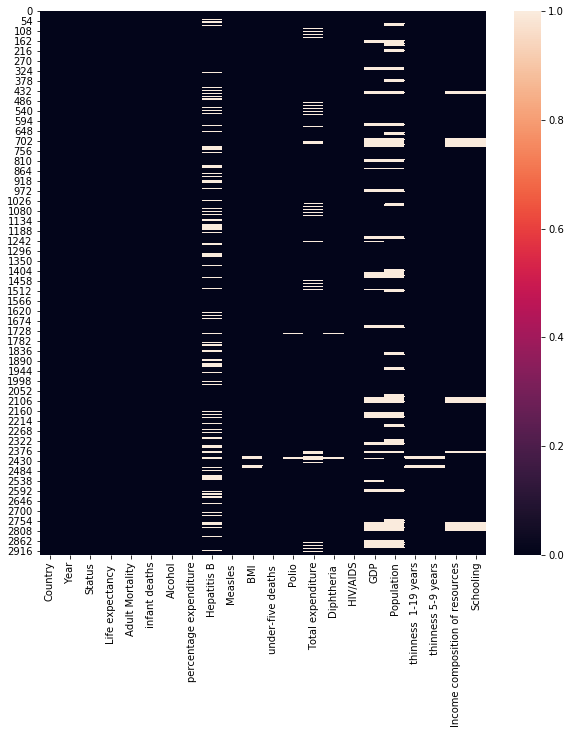

In [14]:
plt.figure(figsize=(10, 10))
sns.heatmap(pd.isnull(df))

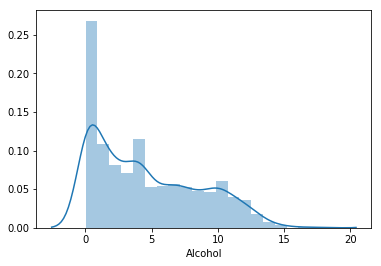

In [15]:
sns.distplot(df['Alcohol'])

In [16]:
scipy.stats.skew(df['Alcohol'],axis=0)

0.5986615690035053

#### Hepatatis B and Diptheria are highly correlated

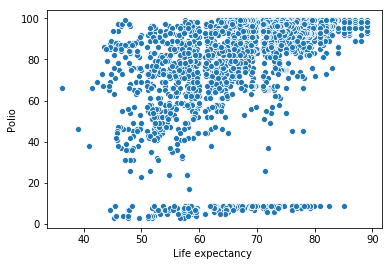

In [17]:
# Hepatatis B and Diptheria are highly correlated

sns.scatterplot(df['Life expectancy '], df['Polio'])

In [18]:
def Polio(c):
    polio = c[0]
    l = c[1]
    if pd.isnull(polio):
        if l <= 45:
            return 80.0
        elif 45 < l <= 50:
            return 67.0
        elif 50 < l <= 60:
            return 87
        elif 60 < l <= 70:
            return 91
        elif 70 < l <= 80:
            return 94.2
        elif 45 < l <= 50:
            return 95.0
    else:
        return polio
    
df["Polio"] = df[['Polio', 'Life expectancy ']].apply(Polio, axis = 1)

In [19]:
col = list(df.columns)
nan_list = []

for i in col :
    x = df[i].isnull().sum()
    nan_list.append(x)
    
null_df = pd.DataFrame({'Columns ':col, 'No. of Nan Values':nan_list})
null_df

,Columns,No. of Nan Values
0,Country,0
1,Year,0
2,Status,0
3,Life expectancy,0
4,Adult Mortality,0
5,infant deaths,0
6,Alcohol,0
7,percentage expenditure,0
8,Hepatitis B,553
9,Measles,0


#### Polio with Diphtheria

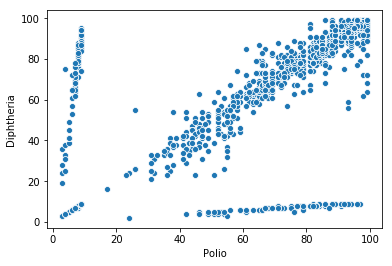

In [20]:
sns.scatterplot(df['Polio'], df['Diphtheria '])

In [21]:
def Diptheria(c):
    diptheria = c[0]
    p = c[1]
    if pd.isnull(diptheria):
        if p <= 10:
            return 75.0
        elif 10 < p <= 40:
            return 37.0
        elif 40 < p <= 45:
            return 40.0
        elif 45 < p <= 50:
            return 50.0
        elif 50 < p <= 60:
            return 55.0
        elif 60 < p <= 80:
            return 65.0
        elif p > 80:
            return 90.0
    else:
        return diptheria
    
df['Diphtheria '] = df[['Diphtheria ', 'Polio']].apply(Diptheria, axis=1)


In [22]:
col = list(df.columns)
nan_list = []

for i in col :
    x = df[i].isnull().sum()
    nan_list.append(x)
    
null_df = pd.DataFrame({'Columns ':col, 'No. of Nan Values':nan_list})
null_df

,Columns,No. of Nan Values
0,Country,0
1,Year,0
2,Status,0
3,Life expectancy,0
4,Adult Mortality,0
5,infant deaths,0
6,Alcohol,0
7,percentage expenditure,0
8,Hepatitis B,553
9,Measles,0


#### Diphtheria with Hepatitis B

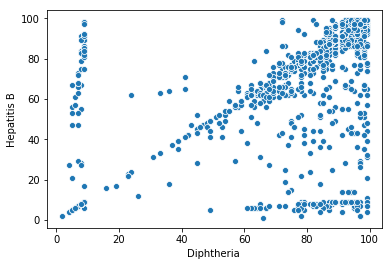

In [23]:
sns.scatterplot(df['Diphtheria '], df['Hepatitis B'])

In [24]:
def HepatitisB(c):
    hepatitis = c[0]
    d = c[1]
    if pd.isnull(hepatitis):
        if d <= 15:
            return 75.0
        elif 15 < d <= 30:
            return 20.0
        elif 30 < d <= 45:
            return 38.0
        elif 45 < d <= 60:
            return 43.0
        elif 60 < d <= 80:
            return 63.0
        else:
            return 88.4
    else:
        return hepatitis

df['Hepatitis B'] = df[['Hepatitis B', 'Diphtheria ']].apply(HepatitisB, axis = 1)
    

In [25]:
col = list(df.columns)
nan_list = []

for i in col :
    x = df[i].isnull().sum()
    nan_list.append(x)
    
null_df = pd.DataFrame({'Columns ':col, 'No. of Nan Values':nan_list})
null_df

,Columns,No. of Nan Values
0,Country,0
1,Year,0
2,Status,0
3,Life expectancy,0
4,Adult Mortality,0
5,infant deaths,0
6,Alcohol,0
7,percentage expenditure,0
8,Hepatitis B,0
9,Measles,0


In [26]:
# df[df['Diphtheria ']>80.0]['Hepatitis B'].mean()

#### BMI with Life Expectancy

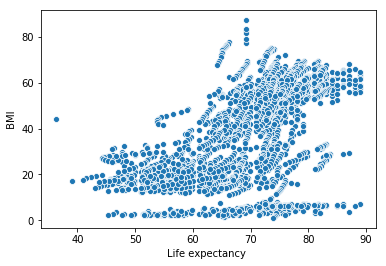

In [27]:
# BMI with Life Expectancy

sns.scatterplot(df['Life expectancy '], df[' BMI '])

In [28]:
def BMI(c):
    bmi = c[0]
    l = c[1]
    if pd.isnull(bmi):
        if l < 60:
            return 25.0
        elif 60 < l <= 70:
            return 32.0
        elif 70 < l <= 80:
            return 46.8
        else:
            return 60.0
    else:
        return bmi
    
df[' BMI '] = df[[' BMI ', 'Life expectancy ']].apply(BMI, axis=1)
            
        

In [29]:
col = list(df.columns)
nan_list = []

for i in col :
    x = df[i].isnull().sum()
    nan_list.append(x)
    
null_df = pd.DataFrame({'Columns ':col, 'No. of Nan Values':nan_list})
null_df

,Columns,No. of Nan Values
0,Country,0
1,Year,0
2,Status,0
3,Life expectancy,0
4,Adult Mortality,0
5,infant deaths,0
6,Alcohol,0
7,percentage expenditure,0
8,Hepatitis B,0
9,Measles,0


#### Total Expenditure with Alcohol

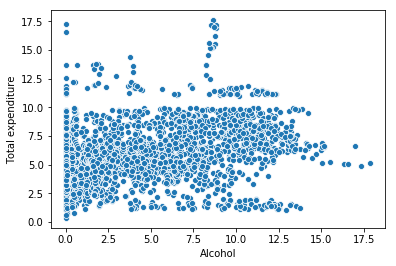

In [30]:
# Total Expenditure with Alcohol

sns.scatterplot( df['Alcohol'], df['Total expenditure'])

In [31]:
def Total_Expenditure(c):
    total_exp = c[0]
    a = c[1]
    if pd.isnull(total_exp):
        if a <= 2.5:
            return 5.08
        elif 2.5 < a <= 5.0:
            return 6.0
        elif 5.0 < a <= 10.0:
            return 6.71
        elif 10 < a <= 12.5:
            return 6.9
        elif a > 12.5:
            return 6.68
    else:
        return total_exp
    
df['Total expenditure'] = df[['Total expenditure', 'Alcohol']].apply(Total_Expenditure, axis=1)

In [32]:
col = list(df.columns)
nan_list = []

for i in col :
    x = df[i].isnull().sum()
    nan_list.append(x)
    
null_df = pd.DataFrame({'Columns ':col, 'No. of Nan Values':nan_list})
null_df

,Columns,No. of Nan Values
0,Country,0
1,Year,0
2,Status,0
3,Life expectancy,0
4,Adult Mortality,0
5,infant deaths,0
6,Alcohol,0
7,percentage expenditure,0
8,Hepatitis B,0
9,Measles,0


#### GDP with Percentage Expenditure

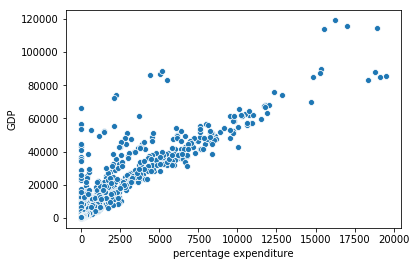

In [33]:
# GDP with Percentage Expenditure

sns.scatterplot(df['percentage expenditure'], df['GDP'])

In [34]:
def GDP(c):
    gdp = c[0]
    p = c[1]
    if pd.isnull(gdp):
        if p <= 1250:
            return 1100.0
        elif 1250 < p <= 2500:
            return 1800.0
        elif 2500 < p <= 3750:
            return 2900.0
        elif 3750 < p <= 7500:
            return 3500.0
        elif 7500 < p <= 8750:
            return 4500.0
        elif 8750 < p <= 10000:
            return 5000.0
        elif 10000 < p <= 12500:
            return 5700.0
        elif 12500 < p <= 15000:
            return 8000.0
        elif 15000 < p <= 17500:
            return 9000.0
        elif p > 17500:
            return 8500.0
    else:
        return gdp

df['GDP'] = df[['GDP', 'percentage expenditure']].apply(GDP, axis=1)

In [35]:
col = list(df.columns)
nan_list = []

for i in col :
    x = df[i].isnull().sum()
    nan_list.append(x)
    
null_df = pd.DataFrame({'Columns ':col, 'No. of Nan Values':nan_list})
null_df

,Columns,No. of Nan Values
0,Country,0
1,Year,0
2,Status,0
3,Life expectancy,0
4,Adult Mortality,0
5,infant deaths,0
6,Alcohol,0
7,percentage expenditure,0
8,Hepatitis B,0
9,Measles,0


#### Population with infant deaths 

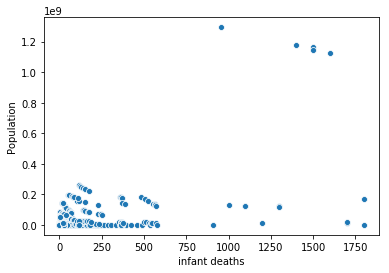

In [36]:
# Population with infant deaths 

sns.scatterplot(df['infant deaths'], df['Population'])

In [37]:
def Population(c):
    population = c[0]
    i=c[1]
    if pd.isnull(population):
        if i <= 100:
            return 0.19*((10)**9)
        elif 100 < i <= 250:
            return 0.18*((10)**9)
        elif 250 < i <= 350:
            return 0.02*((10)**9)
        elif 350 < i <= 900:
            return 0.1*((10)**9)
        elif 900 < i <= 1100:
            return 0.18*((10)**9)
        elif 1100 < i <= 1250:
            return 0.05*((10)**9)
        elif 1250 < i <= 1500:
            return 0.19*((10)**9)
        elif 1500 < i <= 1750:
            return 0.05*((10)**9)
        elif i > 1750:
            return 0.1*((10)**9)
    else:
        return population
    
df['Population'] = df[['Population', 'infant deaths']].apply(Population, axis=1)

In [38]:
col = list(df.columns)
nan_list = []

for i in col :
    x = df[i].isnull().sum()
    nan_list.append(x)
    
null_df = pd.DataFrame({'Columns ':col, 'No. of Nan Values':nan_list})
null_df

,Columns,No. of Nan Values
0,Country,0
1,Year,0
2,Status,0
3,Life expectancy,0
4,Adult Mortality,0
5,infant deaths,0
6,Alcohol,0
7,percentage expenditure,0
8,Hepatitis B,0
9,Measles,0


#### Thinness 1-19 years with BMI

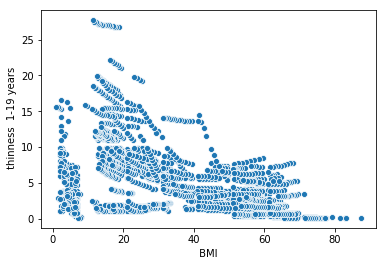

In [39]:
# thinness 1-19 years with BMI

sns.scatterplot(df[' BMI '], df[' thinness  1-19 years'])

In [40]:
def Thin_1_19(c):
    thin = c[0]
    b = c[1]
    if pd.isnull(thin):
        if b <= 10:
            return 5.0
        elif 10 < b <= 20:
            return 10.0
        elif 20 < b <= 30:
            return 8.0
        elif 30 < b <= 40:
            return 6.0
        elif 40 < b <= 50:
            return 3.0
        elif 50 < b <= 70:
            return 4.0
        elif b > 70:
            return 1.0
    else:
        return thin
    
df[' thinness  1-19 years']=df[[' thinness  1-19 years',' BMI ']].apply(Thin_1_19,axis=1)


In [41]:
col = list(df.columns)
nan_list = []

for i in col :
    x = df[i].isnull().sum()
    nan_list.append(x)
    
null_df = pd.DataFrame({'Columns ':col, 'No. of Nan Values':nan_list})
null_df

,Columns,No. of Nan Values
0,Country,0
1,Year,0
2,Status,0
3,Life expectancy,0
4,Adult Mortality,0
5,infant deaths,0
6,Alcohol,0
7,percentage expenditure,0
8,Hepatitis B,0
9,Measles,0


#### Thinness 5-9 years with BMI

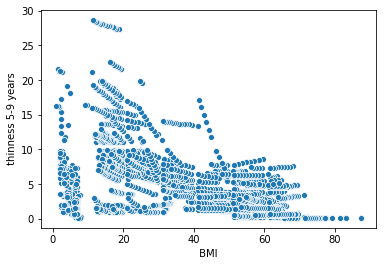

In [42]:
# thinness 5-9 years with BMI

sns.scatterplot(df[' BMI '], df[' thinness 5-9 years'])

In [43]:
def Thin_5_9(c):
    thin = c[0]
    b = c[1]
    if pd.isnull(thin):
        if b <= 10:
            return 5.0
        elif 10 < b <= 20:
            return 10.0
        elif 20 < b <= 30:
            return 8.0
        elif 30 < b <= 40:
            return 6.0
        elif 40 < b <= 50:
            return 3.0
        elif 50 < b <= 70:
            return 4.0
        elif b > 70:
            return 1.0
    else:
        return thin
    
df[' thinness 5-9 years']=df[[' thinness 5-9 years',' BMI ']].apply(Thin_5_9,axis=1)

In [44]:
col = list(df.columns)
nan_list = []

for i in col :
    x = df[i].isnull().sum()
    nan_list.append(x)
    
null_df = pd.DataFrame({'Columns ':col, 'No. of Nan Values':nan_list})
null_df

,Columns,No. of Nan Values
0,Country,0
1,Year,0
2,Status,0
3,Life expectancy,0
4,Adult Mortality,0
5,infant deaths,0
6,Alcohol,0
7,percentage expenditure,0
8,Hepatitis B,0
9,Measles,0


#### Income Composition of Resources with Life Expectancy

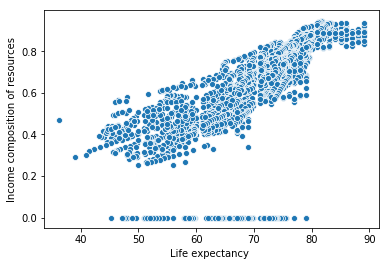

In [45]:
# Income Composition of Resources with Life Expectancy

sns.scatterplot(df['Life expectancy '], df['Income composition of resources'])

In [46]:
def Income_Composition(c):
    income = c[0]
    l = c[1]
    if pd.isnull(income):
        if l <= 40:
            return 0.4
        elif 40< l <= 50:
            return 0.42
        elif 50 < l <=60:
            return 0.402
        elif 60 < l <= 70:
            return 0.54
        elif 70 < l <= 80:
            return 0.71
        elif l > 80:
            return 0.88
    else:
        return income
        
df['Income composition of resources']=df[['Income composition of resources','Life expectancy ']].apply(Income_Composition,axis=1)

In [47]:
col = list(df.columns)
nan_list = []

for i in col :
    x = df[i].isnull().sum()
    nan_list.append(x)
    
null_df = pd.DataFrame({'Columns ':col, 'No. of Nan Values':nan_list})
null_df

,Columns,No. of Nan Values
0,Country,0
1,Year,0
2,Status,0
3,Life expectancy,0
4,Adult Mortality,0
5,infant deaths,0
6,Alcohol,0
7,percentage expenditure,0
8,Hepatitis B,0
9,Measles,0


#### Schooling with Life Expectancy

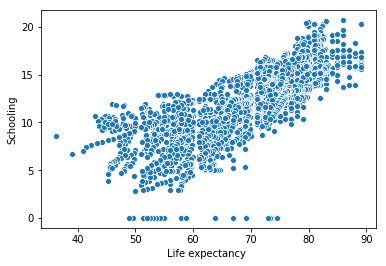

In [48]:
# Schooling with Life Expectancy

sns.scatterplot(df['Life expectancy '], df['Schooling'])

In [49]:
def Schooling(c):
    schooling = c[0]
    l = c[1]
    if pd.isnull(schooling):
        if l <= 40:
            return 8.0
        elif 40 < l <= 44:
            return 7.5
        elif 44 < l <= 50:
            return 8.1
        elif 50 < l <= 60:
            return 8.2
        elif 60 < l <= 70:
            return 10.5
        elif 70 < l <= 80:
            return 13.4
        elif l > 80:
            return 16.5
    else:
        return schooling
    
df['Schooling'] = df[['Schooling','Life expectancy ']].apply(Schooling,axis=1)

In [50]:
col = list(df.columns)
nan_list = []

for i in col :
    x = df[i].isnull().sum()
    nan_list.append(x)
    
null_df = pd.DataFrame({'Columns ':col, 'No. of Nan Values':nan_list})
null_df

,Columns,No. of Nan Values
0,Country,0
1,Year,0
2,Status,0
3,Life expectancy,0
4,Adult Mortality,0
5,infant deaths,0
6,Alcohol,0
7,percentage expenditure,0
8,Hepatitis B,0
9,Measles,0


In [51]:
#df[(df['Life expectancy ']>80) & (df['Life expectancy ']<=90)]['Schooling'].mean()

## Input and Output Variable

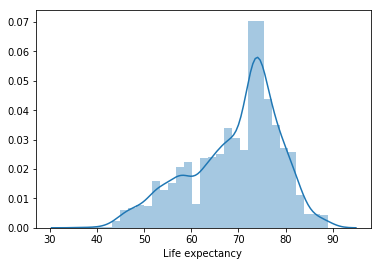

In [52]:
Y = df['Life expectancy ']

sns.distplot(Y)

In [53]:
'''# Creating dummy of object columns

country_dummy= pd.get_dummies(X['Country'])

status_dummy = pd.get_dummies(X['Status'])

#  Dropping the object columns

X.drop(['Country', 'Status'], inplace=True, axis=1)

# Concatinating the object columns at the end of X

X = pd.concat([X, country_dummy, status_dummy], axis=1)

X.info()'''

"# Creating dummy of object columns\n\ncountry_dummy= pd.get_dummies(X['Country'])\n\nstatus_dummy = pd.get_dummies(X['Status'])\n\n#  Dropping the object columns\n\nX.drop(['Country', 'Status'], inplace=True, axis=1)\n\n# Concatinating the object columns at the end of X\n\nX = pd.concat([X, country_dummy, status_dummy], axis=1)\n\nX.info()"

In [54]:
countries = list(df['Country'].unique())

i = 1
for country in countries :
    df['Country'][df['Country']==country] = i
    i += 1

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [55]:
df['Status'][df['Status']=='Developing'] = 1
df['Status'][df['Status']=='Developed'] = 0

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [56]:
df['Country'] = df['Country'].astype(str).astype(int)
df['Status'] = df['Status'].astype(str).astype(int)

In [57]:
df.head()
df.tail()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,193,2004,1,44.3,723.0,27,4.36,0.0,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,193,2003,1,44.5,715.0,26,4.06,0.0,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,193,2002,1,44.8,73.0,25,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,193,2001,1,45.3,686.0,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,193,2000,1,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358879,12222251.0,11.0,11.2,0.434,9.8


In [58]:
X = df.drop('Life expectancy ', axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
Country                            2938 non-null int64
Year                               2938 non-null int64
Status                             2938 non-null int64
Adult Mortality                    2938 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2938 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2938 non-null float64
Measles                            2938 non-null int64
 BMI                               2938 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2938 non-null float64
Total expenditure                  2938 non-null float64
Diphtheria                         2938 non-null float64
 HIV/AIDS                          2938 non-null float64
GDP                                2938 non-null f

In [59]:
X.head()

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,1,2015,1,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,1,2014,1,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,1,2013,1,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,1,2012,1,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,1,2011,1,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [60]:
X.tail()

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,193,2004,1,723.0,27,4.36,0.0,68.0,31,27.1,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,193,2003,1,715.0,26,4.06,0.0,7.0,998,26.7,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,193,2002,1,73.0,25,4.43,0.0,73.0,304,26.3,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,193,2001,1,686.0,25,1.72,0.0,76.0,529,25.9,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,193,2000,1,665.0,24,1.68,0.0,79.0,1483,25.5,...,78.0,7.10,78.0,43.5,547.358879,12222251.0,11.0,11.2,0.434,9.8


## Applying the Machine Learning Algorithm

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 42)

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [64]:
prediction = model.predict(X_test)
print(prediction[0:20])

[68.38898622 76.43020066 74.2134449  77.77191146 48.01951317 50.04900172
 67.45039191 71.48344437 74.30983764 55.63306364 52.50826519 59.22073432
 63.9835848  70.70441366 71.34862784 62.52911746 56.1692283  80.66213323
 68.54409927 82.39474102]


In [65]:
#print(Y_test[0:20])

In [81]:
# for error calculation
from sklearn.metrics import mean_squared_error

mean_square = mean_squared_error(Y_test, prediction)
#print(mean_square)

In [67]:
# For Accuracy calcualtion

from sklearn.metrics import r2_score

score_r2 = r2_score(Y_test, prediction)
print(score_r2)

0.8495817765197466


## Endpoints

In [68]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

2020-06-16 19:18:34,160 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [69]:
wml_credentials = {
    "apikey": "OecGTAx66O9EkvyoAYFZ_2HONa1SinQtAeZbcPhAu8Li",
    "iam_apikey_description": "Auto-generated for key 280f0068-ca95-4d4e-ad15-e77a5c3d2c3c",
    "iam_apikey_name": "Smartbridge_ML",
    "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
    "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/302a7e0903c7471f9e16f1b786c925c0::serviceid:ServiceId-9bfcda81-86ac-47a1-a4af-1cbed646ed1f",
    "instance_id": "afba5c95-38e7-4a1a-8166-584a6211a662",
    "url": "https://us-south.ml.cloud.ibm.com"
}

In [70]:
client = WatsonMachineLearningAPIClient(wml_credentials)

In [71]:
metadata = {
    client.repository.ModelMetaNames.AUTHOR_NAME : 'Shivam',
    client.repository.ModelMetaNames.AUTHOR_EMAIL : 'shivamyadav182000@gmail.com',
    client.repository.ModelMetaNames.NAME : 'LifeExpectancyPrediction'
}

In [72]:
stored_data =  client.repository.store_model(model, meta_props = metadata)

In [73]:
stored_data

{'metadata': {'guid': '7c03cf14-71aa-40aa-b3f1-58599c63f59f',
  'url': 'https://us-south.ml.cloud.ibm.com/v3/wml_instances/afba5c95-38e7-4a1a-8166-584a6211a662/published_models/7c03cf14-71aa-40aa-b3f1-58599c63f59f',
  'created_at': '2020-06-16T19:18:35.723Z',
  'modified_at': '2020-06-16T19:18:35.793Z'},
 'entity': {'runtime_environment': 'python-3.6',
  'learning_configuration_url': 'https://us-south.ml.cloud.ibm.com/v3/wml_instances/afba5c95-38e7-4a1a-8166-584a6211a662/published_models/7c03cf14-71aa-40aa-b3f1-58599c63f59f/learning_configuration',
  'author': {'name': 'Shivam'},
  'name': 'LifeExpectancyPrediction',
  'learning_iterations_url': 'https://us-south.ml.cloud.ibm.com/v3/wml_instances/afba5c95-38e7-4a1a-8166-584a6211a662/published_models/7c03cf14-71aa-40aa-b3f1-58599c63f59f/learning_iterations',
  'feedback_url': 'https://us-south.ml.cloud.ibm.com/v3/wml_instances/afba5c95-38e7-4a1a-8166-584a6211a662/published_models/7c03cf14-71aa-40aa-b3f1-58599c63f59f/feedback',
  'latest

In [74]:
guid = client.repository.get_model_uid(stored_data)

In [75]:
guid

'7c03cf14-71aa-40aa-b3f1-58599c63f59f'

In [76]:
deploy = client.deployments.create(guid)



#######################################################################################

Synchronous deployment creation for uid: '7c03cf14-71aa-40aa-b3f1-58599c63f59f' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='0144a081-569c-46f8-8cbb-41f5dc596022'
------------------------------------------------------------------------------------------------




In [77]:
client.deployments.list()

------------------------------------  -------------------  ------  --------------  ------------------------  -----------------  -------------
GUID                                  NAME                 TYPE    STATE           CREATED                   FRAMEWORK          ARTIFACT TYPE
0144a081-569c-46f8-8cbb-41f5dc596022  Artifact deployment  online  DEPLOY_SUCCESS  2020-06-16T19:18:38.870Z  scikit-learn-0.20  model
86951b4f-3065-45bd-bb3e-f941de84172f  Artifact deployment  online  DEPLOY_SUCCESS  2020-06-15T19:20:06.645Z  scikit-learn-0.20  model
818597d7-2c29-4efe-abe0-07bdad95673d  Artifact deployment  online  DEPLOY_SUCCESS  2020-06-15T18:07:00.174Z  scikit-learn-0.20  model
7a8ce30b-5a2e-41a8-9863-b62a2c80d012  Artifact deployment  online  DEPLOY_SUCCESS  2020-06-13T11:56:23.363Z  scikit-learn-0.20  model
------------------------------------  -------------------  ------  --------------  ------------------------  -----------------  -------------


In [78]:
deploy

{'metadata': {'guid': '0144a081-569c-46f8-8cbb-41f5dc596022',
  'url': 'https://us-south.ml.cloud.ibm.com/v3/wml_instances/afba5c95-38e7-4a1a-8166-584a6211a662/deployments/0144a081-569c-46f8-8cbb-41f5dc596022',
  'created_at': '2020-06-16T19:18:38.870Z',
  'modified_at': '2020-06-16T19:18:39.131Z'},
 'entity': {'runtime_environment': 'python-3.6',
  'name': 'Artifact deployment',
  'scoring_url': 'https://us-south.ml.cloud.ibm.com/v3/wml_instances/afba5c95-38e7-4a1a-8166-584a6211a662/deployments/0144a081-569c-46f8-8cbb-41f5dc596022/online',
  'deployable_asset': {'name': 'LifeExpectancyPrediction',
   'url': 'https://us-south.ml.cloud.ibm.com/v3/wml_instances/afba5c95-38e7-4a1a-8166-584a6211a662/published_models/7c03cf14-71aa-40aa-b3f1-58599c63f59f',
   'guid': '7c03cf14-71aa-40aa-b3f1-58599c63f59f',
   'created_at': '2020-06-16T19:18:38.843Z',
   'type': 'model'},
  'description': 'Description of deployment',
  'status_details': {'status': 'DEPLOY_SUCCESS'},
  'model_type': 'scikit-le

In [79]:
scoring_endpoint = client.deployments.get_scoring_url(deploy)

In [80]:
scoring_endpoint

'https://us-south.ml.cloud.ibm.com/v3/wml_instances/afba5c95-38e7-4a1a-8166-584a6211a662/deployments/0144a081-569c-46f8-8cbb-41f5dc596022/online'